<a href="https://colab.research.google.com/github/super-sg/Airbnb-NYC-Listings-Data-Analysis/blob/main/Airbnb_NYC_Listings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb NYC Listings



# 1. An analysis of popular neighbourhoods to find the busiest host as well as their top neighbourhood group in terms of listings and price.

# 2. Using regrssion models to predict the price and comparing them

# 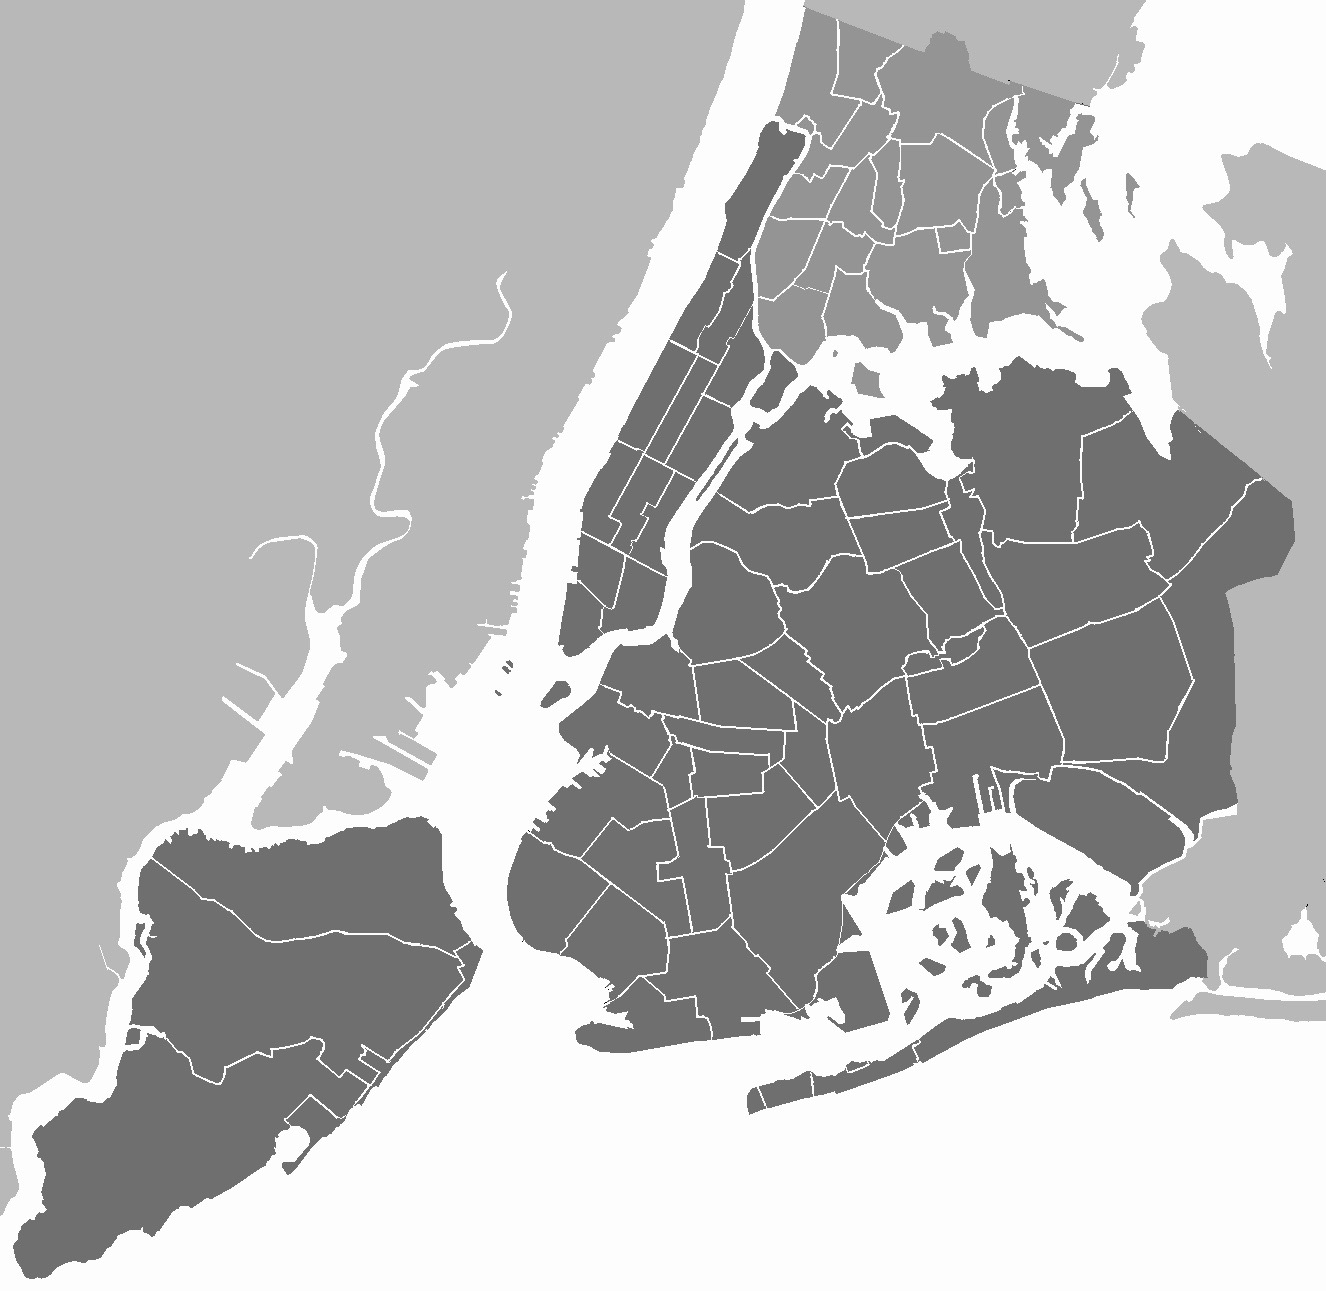

In [131]:
import pandas as pd

In [132]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [133]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [134]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [135]:
df.shape

(48895, 16)

In [136]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [137]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("\nNon-categorical columns:", non_categorical_cols)

Categorical columns: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

Non-categorical columns: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [138]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# The summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [140]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [141]:
df['name'].fillna('unknown', inplace=True)
df['host_name'].fillna('unknown', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df.drop('last_review', axis=1, inplace=True)

/tmp/ipython-input-141-1493406632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('unknown', inplace=True)
/tmp/ipython-input-141-1493406632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
import seaborn as sb
import matplotlib.pyplot as plt

<Axes: >

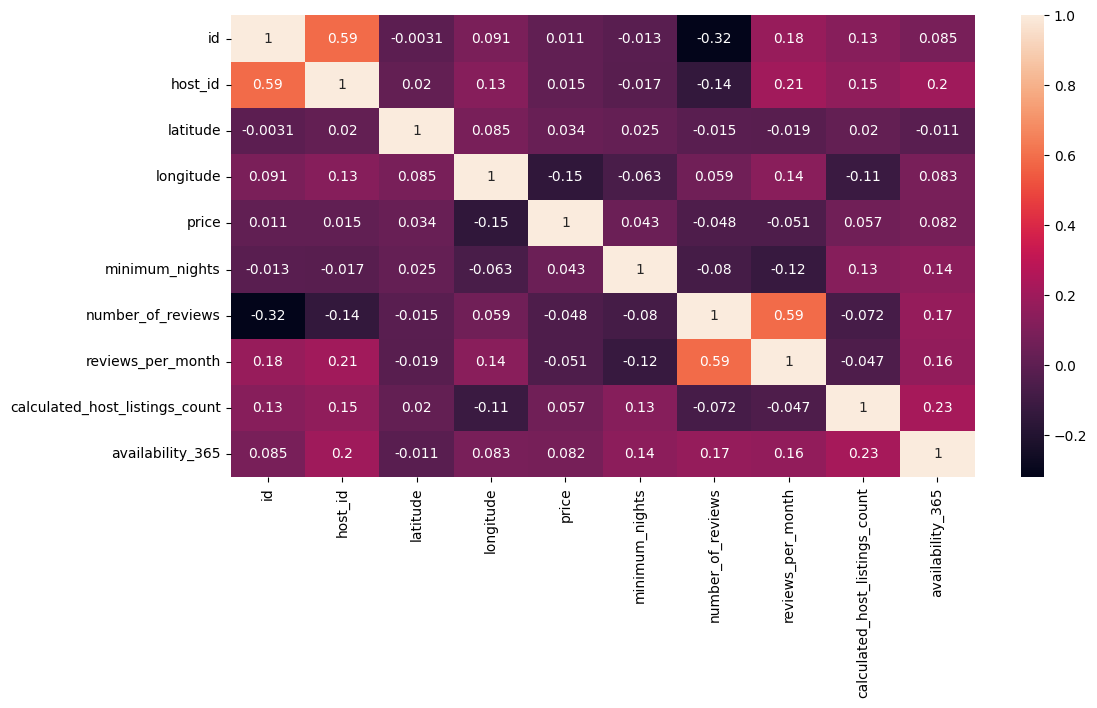

In [144]:
sb.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [145]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
13216,Sonder,Manhattan,96
6540,Jeremy & Laura,Manhattan,96
2901,Corporate Housing,Manhattan,91


# Observation : From the above result, we can conclude that the name of the host with the most listings is Sonder(NYC) who has 327 listings in Manhattan

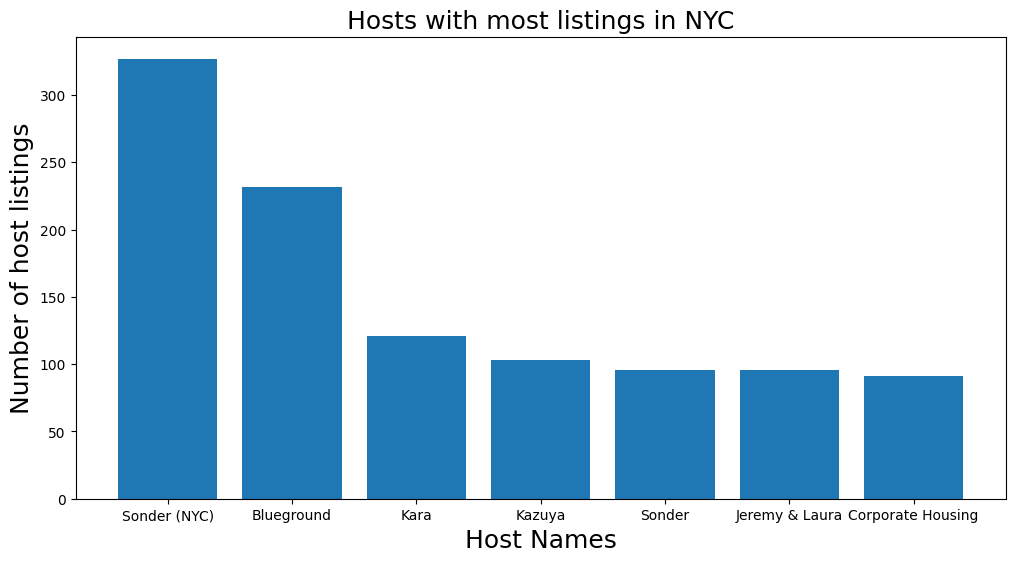

In [146]:
plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

In [147]:
# Number of Airbnb listed in each neighbourhood
data =df.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


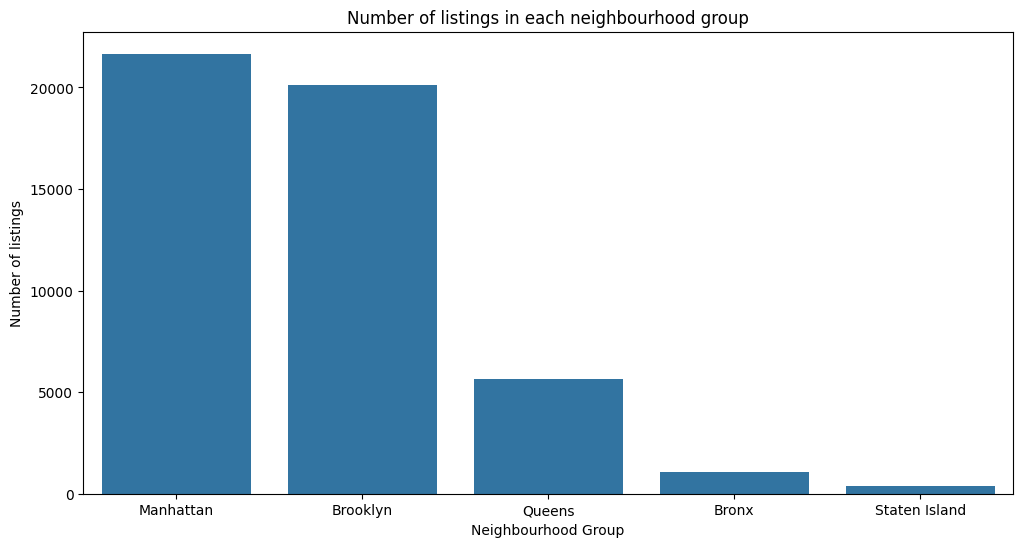

In [148]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sb.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

# The neighborhoods with the most listings are in Manhattan and Brooklyn – which is understandable – given that tourists are more likely to stay in those areas.

In [149]:
# Visualize Outliers Before and After Treatment Side-by-Side
outlier_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
df_original = df.copy()

In [150]:
import numpy as np

In [151]:
# Treating Outliers: Cap extreme values based on IQR
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))


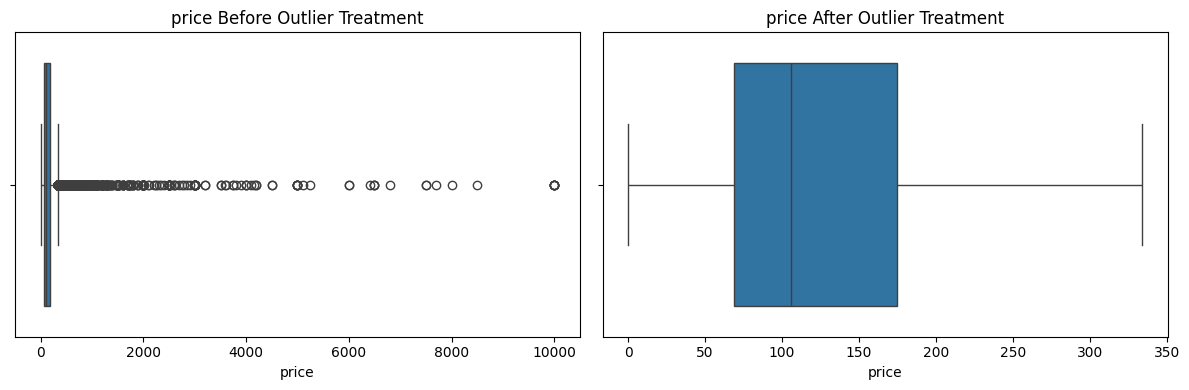

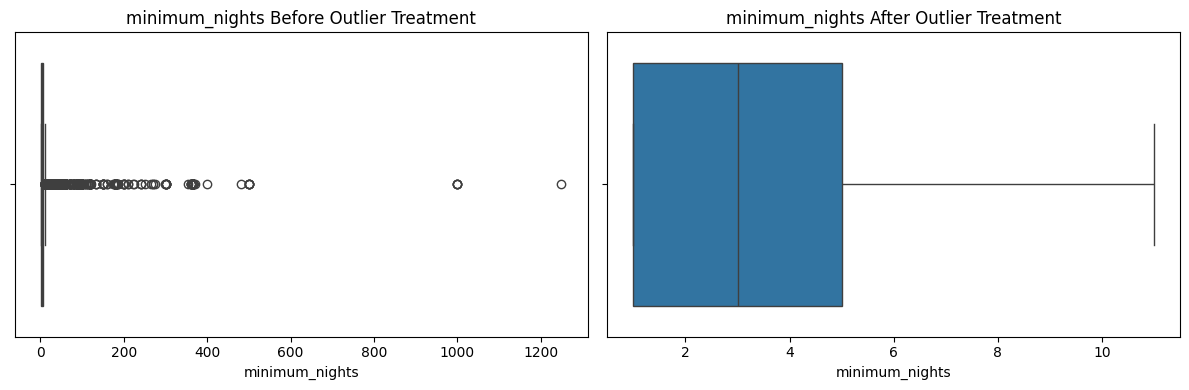

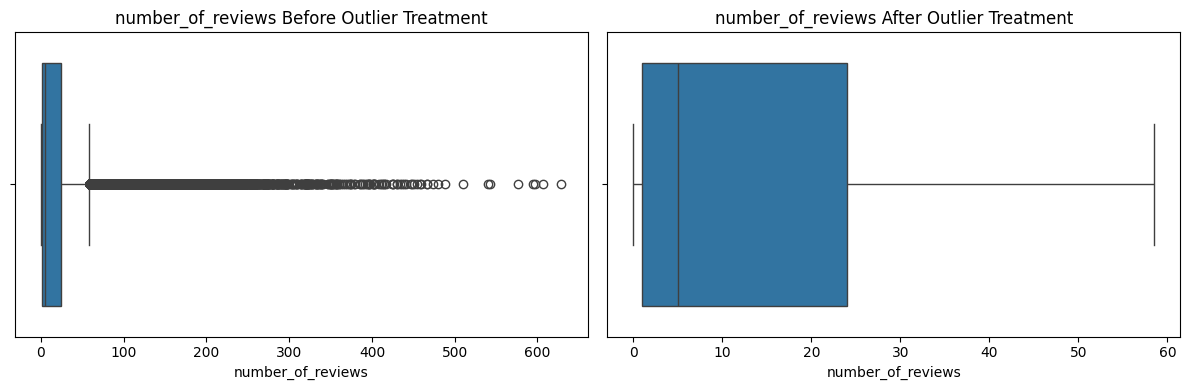

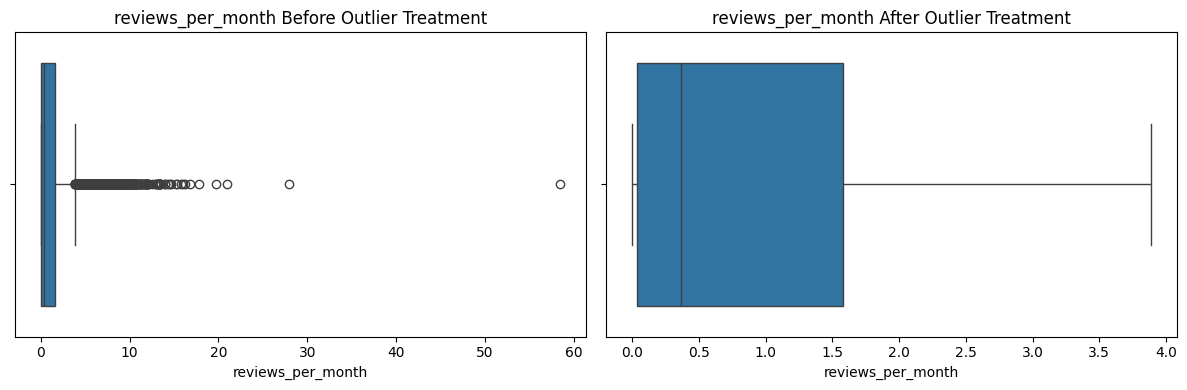

In [152]:
# Side-by-side boxplots
for col in outlier_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.boxplot(x=df_original[col], ax=axes[0])
    axes[0].set_title(f'{col} Before Outlier Treatment')
    sb.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'{col} After Outlier Treatment')
    plt.tight_layout()
    plt.show()

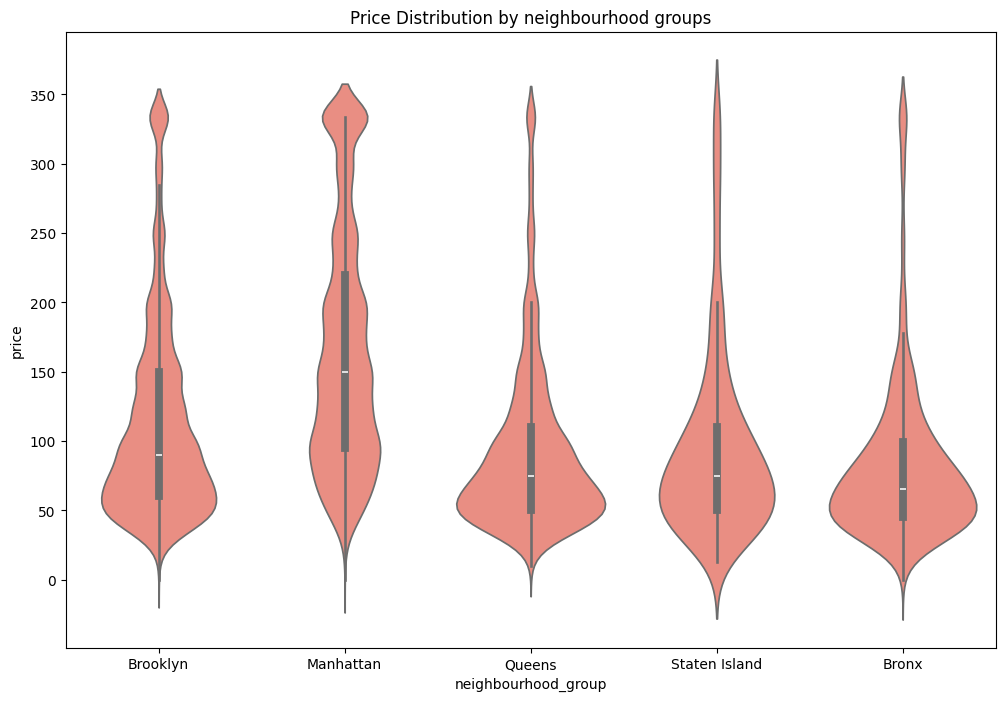

In [153]:
# Price distribution by neighbourhood groups
plt.figure(figsize=(12,8))
ax = sb.violinplot(x="neighbourhood_group", y="price", data=df,color="salmon").set_title('Price Distribution by neighbourhood groups')
plt.show()

# We can conclude from the analysis that Manhattan is the top neighbourhood group when it comes to the number of listings and highest rental prices. Given that Manhattan is a world-famous for its museums, stores, parks and theatres - and its substantial number of tourists throughout the year, hence the prices are much higher in this borough.

# PRICE PREDICTION using Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [155]:
# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [156]:
# Linear Regression: Predicting price
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365'] + \
           [col for col in df.columns if col.startswith('neighbourhood_group_') or col.startswith('room_type_')]

X = df[features]
y = df['price']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred = lnr.predict(X_test)

In [160]:
mean_squared_error(y_test, y_pred)

3765.4864230057096

In [161]:
# More insightful cross-validation for Linear Regression
from sklearn.model_selection import KFold, cross_validate
import numpy as np
import time

k_values = [3, 5, 10]
mean_accuracies = []
runtimes = []

for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    lr_model = LinearRegression()

    start_time = time.time()
    scores = cross_validate(lr_model, X, y, cv=cv, scoring='neg_mean_squared_error')
    end_time = time.time()

    # Convert negative MSE to positive MSE for plotting
    mse_scores = -scores['test_score']
    mean_mse = np.mean(mse_scores)
    mean_accuracies.append(mean_mse) # Storing MSE for plotting, not accuracy in this case

    runtime = end_time - start_time
    runtimes.append(runtime)

    print(f"k = {k}")
    print(f"Scores: {scores}")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Runtime: {runtime:.4f} seconds")

k = 3
Scores: {'fit_time': array([0.01040268, 0.01037574, 0.00968838]), 'score_time': array([0.00199986, 0.00222898, 0.00212145]), 'test_score': array([-3795.73141172, -3863.36172296, -3960.86692236])}
Mean MSE: 3873.3200
Runtime: 0.0432 seconds
k = 5
Scores: {'fit_time': array([0.01146889, 0.01370835, 0.01319194, 0.01329875, 0.0128262 ]), 'score_time': array([0.00219464, 0.00213122, 0.00194597, 0.00215197, 0.00208092]), 'test_score': array([-3765.48642301, -3825.24252619, -3936.71842996, -3830.2802037 ,
       -4007.67619035])}
Mean MSE: 3873.0808
Runtime: 0.0808 seconds
k = 10
Scores: {'fit_time': array([0.01465154, 0.01484203, 0.01478934, 0.01432896, 0.01586223,
       0.01618123, 0.01563597, 0.01542306, 0.01566219, 0.01566768]), 'score_time': array([0.00203347, 0.0020175 , 0.00194311, 0.00200605, 0.00242233,
       0.00227261, 0.00223088, 0.0024662 , 0.00249314, 0.00197077]), 'test_score': array([-3664.05614377, -3870.96396121, -3809.98175437, -3836.01222897,
       -3913.98124126,

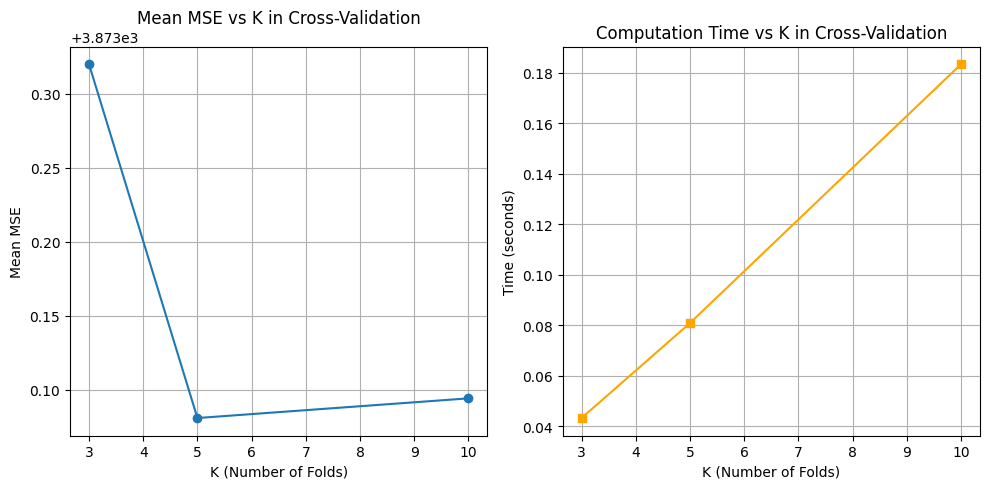

In [162]:
plt.figure(figsize=(10, 5))

# Plot Mean MSE
plt.subplot(1, 2, 1)
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.title("Mean MSE vs K in Cross-Validation")
plt.xlabel("K (Number of Folds)")
plt.ylabel("Mean MSE")
plt.grid(True)

# Plot Computation Time
plt.subplot(1, 2, 2)
plt.plot(k_values, runtimes, marker='s', color='orange', linestyle='-')
plt.title("Computation Time vs K in Cross-Validation")
plt.xlabel("K (Number of Folds)")
plt.ylabel("Time (seconds)")
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [163]:
numerical_cols_for_scaling = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                              'calculated_host_listings_count', 'availability_365']

scaler = StandardScaler()
X_scaled = df.copy()
X_scaled[numerical_cols_for_scaling] = scaler.fit_transform(X_scaled[numerical_cols_for_scaling])

display(X_scaled.head())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149.0,-0.850824,-0.327981,-0.627188,1.990847,1.916250,True,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225.0,-0.850824,1.441120,-0.489891,0.406686,1.840275,False,True,False,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150.0,-0.248539,-0.770256,-0.796790,-0.649421,1.916250,False,True,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89.0,-0.850824,2.104533,2.344886,-0.649421,0.617065,True,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80.0,1.859459,-0.327981,-0.716027,-0.649421,-0.856865,False,True,False,False,False,False


# Comparing the Performance between SVR, Random Forest and Gradient Boosting Regressor

In [164]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [165]:
features_scaled = [col for col in X_scaled.columns if col not in ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'price', 'price_class']]
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled[features_scaled], df['price'], test_size=0.2, random_state=42)

In [166]:
svr = SVR()
svr.fit(X_scaled_train, y_scaled_train)

SVR()

In [167]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_scaled_train, y_scaled_train)

GradientBoostingRegressor(random_state=42)

In [168]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_scaled_train, y_scaled_train)

RandomForestRegressor(random_state=42)

In [169]:
# Make predictions on the scaled test set
y_pred_rfr = rfr.predict(X_scaled_test)
y_pred_gbr = gbr.predict(X_scaled_test)
y_pred_svr = svr.predict(X_scaled_test)

# Calculate MSE for each model
mse_rfr = mean_squared_error(y_scaled_test, y_pred_rfr)
mse_gbr = mean_squared_error(y_scaled_test, y_pred_gbr)
mse_svr = mean_squared_error(y_scaled_test, y_pred_svr)

# Calculate RMSE for each model
rmse_rfr = np.sqrt(mse_rfr)
rmse_gbr = np.sqrt(mse_gbr)
rmse_svr = np.sqrt(mse_svr)

# Print the evaluation metrics
print(f"Random Forest Regressor:")
print(f"  MSE: {mse_rfr:.4f}")
print(f"  RMSE: {rmse_rfr:.4f}\n")

print(f"Gradient Boosting Regressor:")
print(f"  MSE: {mse_gbr:.4f}")
print(f"  RMSE: {rmse_gbr:.4f}\n")

print(f"Support Vector Regressor:")
print(f"  MSE: {mse_svr:.4f}")
print(f"  RMSE: {rmse_svr:.4f}")

Random Forest Regressor:
  MSE: 2964.8903
  RMSE: 54.4508

Gradient Boosting Regressor:
  MSE: 3098.9285
  RMSE: 55.6680

Support Vector Regressor:
  MSE: 7287.2925
  RMSE: 85.3656


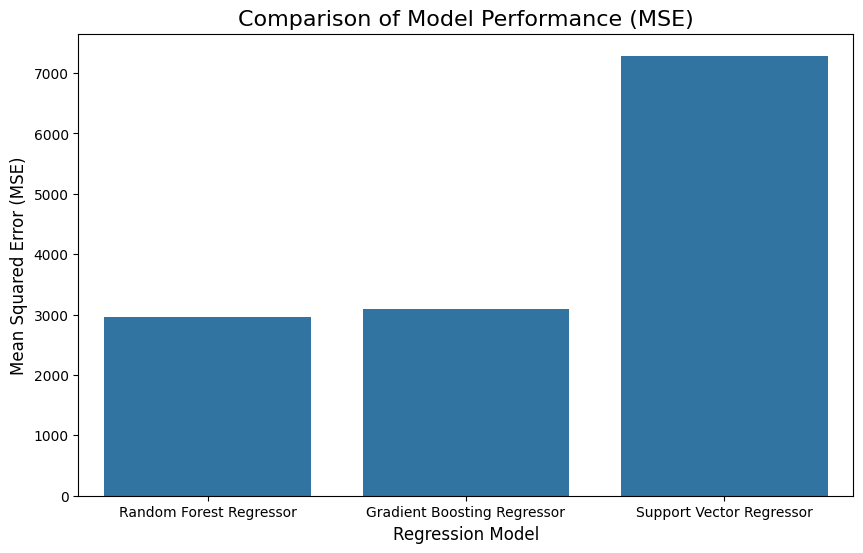

In [171]:
model_names = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor']
mse_values = [mse_rfr, mse_gbr, mse_svr]

plt.figure(figsize=(10, 6))
sb.barplot(x=model_names, y=mse_values)
plt.title('Comparison of Model Performance (MSE)', fontsize=16)
plt.xlabel('Regression Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Random Forest Regressor achieved the lowest Mean Squared Error (MSE) of 2964.8903 and the lowest Root Mean Squared Error (RMSE) of 54.4508 among the evaluated models.
*   The Gradient Boosting Regressor had an MSE of 3098.9285 and an RMSE of 55.6680.
*   The Support Vector Regressor showed the highest MSE (7287.2925) and RMSE (85.3656), indicating the poorest performance among the three models.

### Insights or Next Steps

*   The Random Forest Regressor is the best-performing model for this price prediction task based on the MSE and RMSE metrics. Further hyperparameter tuning could potentially improve its performance.
*   The significant difference in performance between the Support Vector Regressor and the tree-based models suggests that the relationship between features and price might be better captured by ensemble methods like Random Forest and Gradient Boosting.
